In [1]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt

In [2]:
du_dt = lambda u, v:  998 * u + 1998 * v
dv_dt = lambda u, v: -999 * u - 1999 * v
f = lambda u, v: np.array([du_dt(u, v), dv_dt(u, v)]) # двумерная функция двух переменных

In [3]:
def explicit_euler(r0, N, h):
    # input : r0 = [x_0, y_0] - начальные условия
    #         N - кол-во отсчетов по времени
    #         h - шаг по времени
    r = [r0]
    for i in range(N):
        last = r[-1]
        r += [last + h * f(last[0], last[1])]
    return np.array(r).transpose() # возвращает массивы u и v, каждый из N точек

In [4]:
def Df(f, x): # центральная производная
    return (f(x + delta) - f(x - delta)) / (2 * delta)

In [5]:
def J(r): 
    s1 = [Df(lambda u: du_dt(u, r[1]), r[0]), Df(lambda v: du_dt(r[0], v), r[1])]
    s2 = [Df(lambda u: dv_dt(u, r[1]), r[0]), Df(lambda v: dv_dt(r[0], v), r[1])]
    return np.array([s1, s2]) # возвращает матрицу частных производных двумерной функции f --^ в точке r

In [6]:
def inv(m):
    # input : m - двумерная невырожденная матрица
    det = m[0][0] * m[1][1] - m[0][1] * m[1][0]
    return np.array([[m[1][1], -m[0][1]], [-m[1][0], m[0][0]]]) / det # возвращает обратную к m матрицу

In [7]:
def mult(m, r):
    # input : m - двумерная матрица
    #         r - список двух элементов [u, v] -- вектор
    return np.array([m[0][0] * r[0] + m[0][1] * r[1], m[1][0] * r[0] + m[1][1] * r[1]]) 
    # возвращает произведение матрицы m на вектор r : m.r

In [8]:
def implicit_euler(r0, N, h):
    # input : r0 = [x_0, y_0] - начальные условия
    #         N - кол-во отсчетов по времени
    #         h - шаг по времени
    r = [r0]
    for i in range(N):
        last = r[-1]
        M = inv(np.eye(2) - h * J(last))
        r += [last + h * mult(M, f(last[0], last[1]))]
    return np.array(r).transpose() # возвращает массивы u и v, каждый из N точек

In [9]:
def coeff(r0):
    return mult(inv([[2, 1], [-1, -1]]), r0)# возвращает коэффициенты точного решения, проходящего в момент t = 0 через точку r0

In [10]:
def exact(r0, N, h):
    # input : r0 = [x_0, y_0] - начальные условия
    #         N - кол-во отсчетов по времени
    #         h - шаг по времени
    alpha, beta = coeff(r0)
    t = [h * n for n in range(N)]
    r = [alpha * np.exp(-s) * np.array([2, -1]) + beta * np.exp(-1000 * s) * np.array([1, -1]) for s in t]
    return np.array(r).transpose() # возвращает массивы u и v аналитического решения, каждый из N точек

In [20]:
h = 5.e-3
delta = 1.e-3

---

In [25]:
r0 = np.array([-2.68e-7, 1.33e-7])

u_exact, v_exact = exact(r0, 1000, 1.e-5)
u_exp, v_exp = explicit_euler(r0, 100, 1.e-3)
u_imp, v_imp = implicit_euler(r0, 100, 1.e-3)

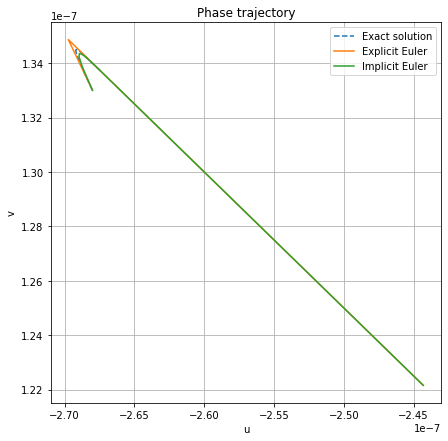

In [26]:
plt.figure(figsize=(7, 7))

plt.plot(u_exact, v_exact, '--', label='Exact solution')
plt.plot(u_exp, v_exp, '-', label='Explicit Euler')
plt.plot(u_imp, v_imp, '-', label='Implicit Euler')
plt.legend()
plt.grid()
plt.xlabel('u')
plt.ylabel('v')
plt.title('Phase trajectory')
plt.show()